<a href="https://colab.research.google.com/github/OmarAbdo7/Walmart_Sales_Project/blob/main/Bi_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# **Reading the Data**

In [39]:
df = pd.read_csv('Walmart Dataset.csv',encoding='latin')

# **Pre-Processing**

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9971 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [41]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode        23
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount         49
Profit            0
dtype: int64

In [42]:
## there is nulls in Ship Mode(object) and Discount(float) columns
## dealing with nulls in Discount column
df['Discount'] = df['Discount'].fillna(df['Discount'].mean())

In [43]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode        23
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [44]:
## dealing with nulls in Ship Mode column
df['Ship Mode'].mode() # Categorical column

0    Standard Class
Name: Ship Mode, dtype: object

In [45]:
df['Ship Mode'].fillna('Standard Class', inplace=True)

In [46]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [47]:
from scipy import stats
z_scores = stats.zscore(df['Sales'])
outliers = df[(z_scores > 3) | (z_scores < -3)]

In [48]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]

In [49]:
df['Sales'] = df['Sales'].clip(lower=lower_bound, upper=upper_bound)

In [50]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [51]:
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [52]:
df['Region'].value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [54]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [55]:
df.duplicated().sum()

0

In [56]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {col: LabelEncoder() for col in ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']}

for col in label_encoders:
    df[col] = label_encoders[col].fit_transform(df[col])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   int64         
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   int64         
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   int64         
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   int64         
 15  Sub-Category   9994 n

# **Summary Statistics**

In [58]:
Total = df['Quantity'].sum()
quantity_mean =df['Quantity'].mean()
quantity_median =df['Quantity'].median()
quantity_mode =df['Quantity'].mode()
quantity_std =df['Quantity'].std()
quantity_variance =df['Quantity'].var()
print("Quantity data : ")
print("Total  : ",Total, " Mean : ",quantity_mean," Median : ",quantity_median," Mode : ",quantity_mode,"     Standard Deviation : ",quantity_std," Variance : ",quantity_variance)

Quantity data : 
Total  :  37873  Mean :  3.789573744246548  Median :  3.0  Mode :  0    3
Name: Quantity, dtype: int64      Standard Deviation :  2.2251096911414  Variance :  4.951113137611377


In [59]:
Total = df['Profit'].sum()
Profit_mean =df['Profit'].mean()
Profit_median =df['Profit'].median()
Profit_mode =df['Profit'].mode()
Profit_std =df['Profit'].std()
Profit_variance =df['Profit'].var()
print("Profit data : ")
print("Total  : ",Total, " Mean : ",Profit_mean," Median : ",Profit_median," Mode : ",Profit_mode,"     Standard Deviation : ",Profit_std," Variance : ",Profit_variance)

Profit data : 
Total  :  286397.0217  Mean :  28.65689630778467  Median :  8.6665  Mode :  0    0.0
Name: Profit, dtype: float64      Standard Deviation :  234.2601076909573  Variance :  54877.79805537892


In [60]:
Total = df['Sales'].sum()
Sales_mean =df['Sales'].mean()
Sales_median =df['Sales'].median()
Sales_mode =df['Sales'].mode()
Sales_std =df['Sales'].std()
Sales_variance =df['Sales'].var()
print("Sales data : ")
print("Total  : ",Total, " Mean : ",Sales_mean," Median : ",Sales_median," Mode : ",Sales_mode,"     Standard Deviation : ",Sales_std," Variance : ",Sales_variance)

Sales data : 
Total  :  1401969.3654  Mean :  140.28110520312188  Median :  54.489999999999995  Mode :  0    498.93
Name: Sales, dtype: float64      Standard Deviation :  168.8042414994666  Variance :  28494.871948210242


# **Visualizing**

In [61]:
# To identify the Category with the highest sales
max_sales_category = df.groupby('Category')['Sales'].sum()
max_sales_category

Category
0    480878.0084
1    493104.0040
2    427987.3530
Name: Sales, dtype: float64

In [62]:
# To identify the segement with the highest sales
max_sales_segment = df.groupby('Segment')['Sales'].sum()
max_sales_segment

Segment
0    719606.5338
1    431102.1318
2    251260.6998
Name: Sales, dtype: float64

In [63]:
#To identify the Region with the highest sales
max_sales_region = df.groupby('Region')['Sales'].sum()
max_sales_region

Region
0    311665.9234
1    399530.1040
2    228363.2555
3    462410.0825
Name: Sales, dtype: float64

In [64]:
#To identify the State with the highest sales
max_sales_state = df.groupby('State')['Sales'].sum()
max_sales_state

State
Alabama                  10893.3100
Arizona                  28928.0290
Arkansas                  8790.7400
CALIFORNIA                 236.1740
California              293984.9035
Colorado                 24181.8930
Connecticut              10877.5970
Delaware                 13060.6590
District of Columbia      1215.4300
Florida                  48049.6035
Georgia                  28137.8300
Idaho                     3555.5360
Illinois                 60270.7530
Indiana                  23167.3700
Iowa                      2984.8000
Kansas                    2914.3100
Kentucky                 22769.0600
Louisiana                 6638.7200
Maine                     1270.5300
Maryland                 16042.9020
Massachusetts            20546.1620
Michigan                 42700.6960
Minnesota                13635.6000
Mississippi               8191.7600
Missouri                  9918.7400
Montana                   2461.2420
Nebraska                  4329.6300
Nevada                

In [65]:
#To identify the City with the highest sales
max_sales_city = df.groupby('City')['Sales'].sum()
max_sales_city

City
Aberdeen         25.500
Abilene           1.392
Akron          2563.508
Albuquerque    2124.090
Alexandria     1854.450
                 ...   
Woonsocket      195.550
Yonkers        2874.014
York            817.978
Yucaipa          50.800
Yuma            739.810
Name: Sales, Length: 531, dtype: float64

In [66]:
#To identify the State with the highest profit
max_prof_state = df.groupby('State')['Profit'].sum()
max_prof_state

State
Alabama                  5786.8253
Arizona                 -3427.9246
Arkansas                 4008.6871
CALIFORNIA                 96.2399
California              76285.1472
Colorado                -6527.8579
Connecticut              3511.4918
Delaware                 9977.3748
District of Columbia     1059.5893
Florida                 -3399.3017
Georgia                 16250.0433
Idaho                     826.7231
Illinois               -12607.8870
Indiana                 18382.9363
Iowa                     1183.8119
Kansas                    836.4435
Kentucky                11199.6966
Louisiana                2196.1023
Maine                     454.4862
Maryland                 7031.1788
Massachusetts            6785.5016
Michigan                24463.1876
Minnesota               10823.1874
Mississippi              3172.9762
Missouri                 6436.2105
Montana                  1833.3285
Nebraska                 2037.0942
Nevada                   3316.7659
New Hampshire 

In [67]:
#To identify the City with the highest profit
max_prof_city = df.groupby('City')['Profit'].sum()
max_prof_city

City
Aberdeen          6.6300
Abilene          -3.7584
Akron          -186.6356
Albuquerque     634.0881
Alexandria      318.6183
                 ...    
Woonsocket       78.6791
Yonkers        2767.7557
York           -102.1692
Yucaipa          13.2080
Yuma           -465.9909
Name: Profit, Length: 531, dtype: float64

<ipython-input-68-4c30e0457860>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=max_sales_category.index, y=max_sales_category.values, palette='hls')


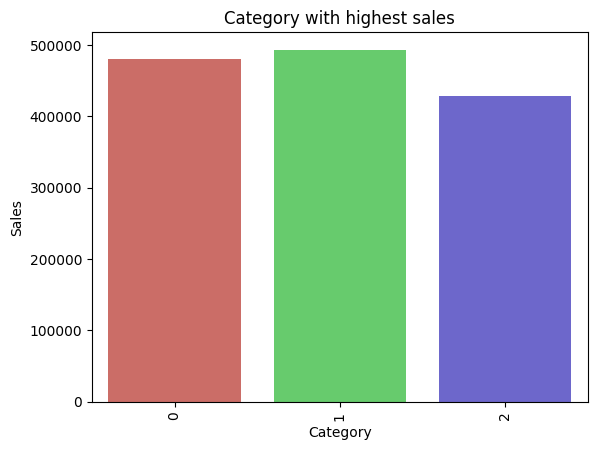

In [68]:
sns.barplot(x=max_sales_category.index, y=max_sales_category.values, palette='hls')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Category with highest sales')
plt.show()

In [69]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,2,CG-12520,Claire Gute,0,United States,Henderson,...,42420,2,FUR-BO-10001798,0,4,Bush Somerset Collection Bookcase,261.960,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,2,CG-12520,Claire Gute,0,United States,Henderson,...,42420,2,FUR-CH-10000454,0,5,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",498.930,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,2,DV-13045,Darrin Van Huff,1,United States,Los Angeles,...,90036,3,OFF-LA-10000240,1,10,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,3,SO-20335,Sean O'Donnell,0,United States,Fort Lauderdale,...,33311,2,FUR-TA-10000577,0,16,Bretford CR4500 Series Slim Rectangular Table,498.930,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,3,SO-20335,Sean O'Donnell,0,United States,Fort Lauderdale,...,33311,2,OFF-ST-10000760,1,14,Eldon Fold 'N Roll Cart System,22.368,2,0.20,2.5164


In [70]:
category_city = df.groupby(['City'])['Category'].sum()
category_city

City
Aberdeen        1
Abilene         1
Akron          24
Albuquerque    19
Alexandria     16
               ..
Woonsocket      3
Yonkers        18
York            4
Yucaipa         1
Yuma            6
Name: Category, Length: 531, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

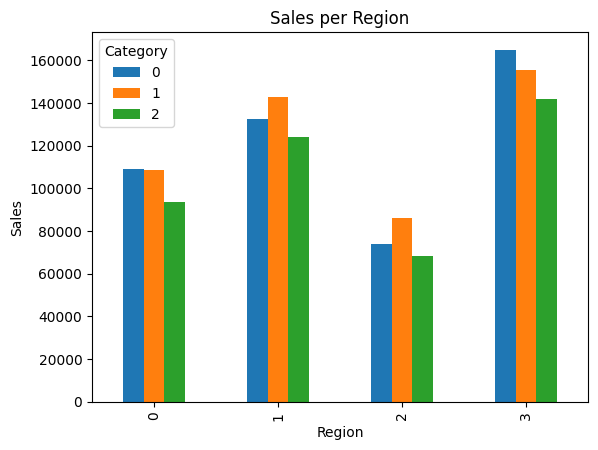

In [71]:
import matplotlib.pyplot as plt
df.groupby(["Region", "Category"])['Sales'].sum().unstack().plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Sales per Region')
plt.show

In [72]:
df["order_year"] = df['Order Date'].dt.year
df['order_year']

0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9989    2014
9990    2017
9991    2017
9992    2017
9993    2017
Name: order_year, Length: 9994, dtype: int32

In [73]:
df["order_month"]=df['Order Date'].dt.month
df['order_month']

0       11
1       11
2        6
3       10
4       10
        ..
9989     1
9990     2
9991     2
9992     2
9993     5
Name: order_month, Length: 9994, dtype: int32

In [74]:
df["order_day"]=df['Order Date'].dt.day
df['order_day']

0        8
1        8
2       12
3       11
4       11
        ..
9989    21
9990    26
9991    26
9992    26
9993     4
Name: order_day, Length: 9994, dtype: int32

In [75]:
# Arrange the Sales according to the year
final_order_Sales_By_year = df.groupby('order_year')['Sales'].sum()
final_order_Sales_By_year

order_year
2014    284350.2301
2015    303821.9016
2016    362143.7773
2017    451653.4564
Name: Sales, dtype: float64

<ipython-input-76-a8584d24b4f9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_order_Sales_By_year.index, y=final_order_Sales_By_year.values, palette='hls')


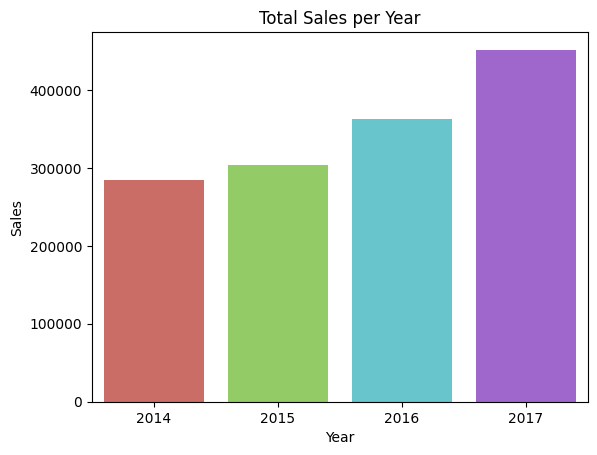

In [76]:
import matplotlib.pyplot as plt
sns.barplot(x=final_order_Sales_By_year.index, y=final_order_Sales_By_year.values, palette='hls')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Total Sales per Year')
plt.show()

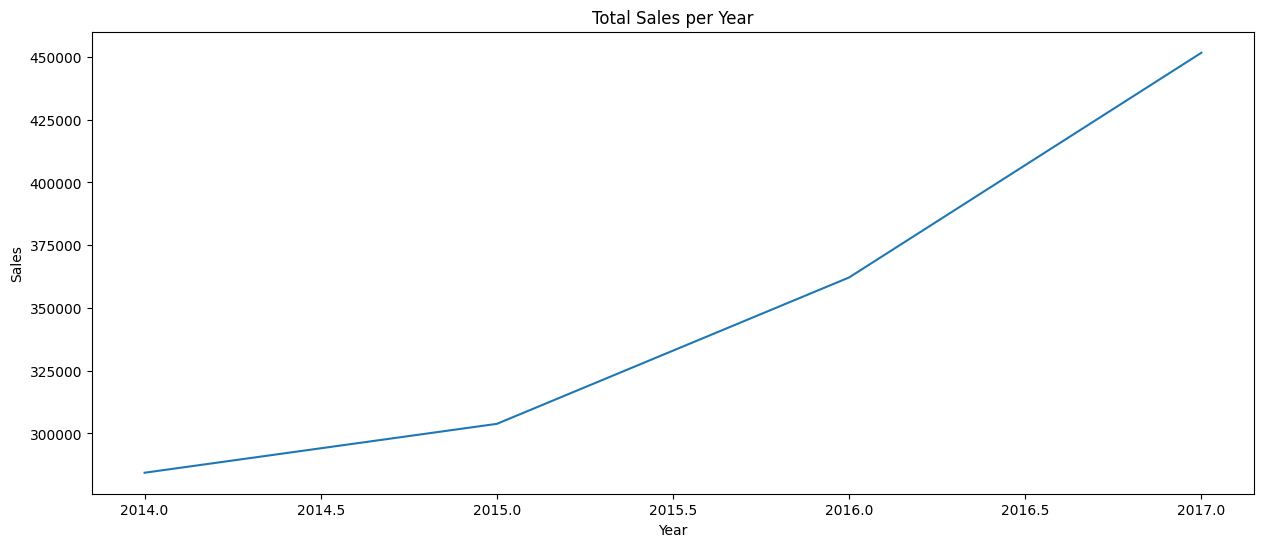

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(final_order_Sales_By_year.index,final_order_Sales_By_year.values)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Total Sales per Year')
plt.show()

In [78]:
df.to_csv('preprocessed_WalmartSales.csv', index=False)

# **Modeling**

In [79]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_day
0,1,CA-2016-152156,2016-11-08,2016-11-11,2,CG-12520,Claire Gute,0,United States,Henderson,...,0,4,Bush Somerset Collection Bookcase,261.960,2,0.00,41.9136,2016,11,8
1,2,CA-2016-152156,2016-11-08,2016-11-11,2,CG-12520,Claire Gute,0,United States,Henderson,...,0,5,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",498.930,3,0.00,219.5820,2016,11,8
2,3,CA-2016-138688,2016-06-12,2016-06-16,2,DV-13045,Darrin Van Huff,1,United States,Los Angeles,...,1,10,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.00,6.8714,2016,6,12
3,4,US-2015-108966,2015-10-11,2015-10-18,3,SO-20335,Sean O'Donnell,0,United States,Fort Lauderdale,...,0,16,Bretford CR4500 Series Slim Rectangular Table,498.930,5,0.45,-383.0310,2015,10,11
4,5,US-2015-108966,2015-10-11,2015-10-18,3,SO-20335,Sean O'Donnell,0,United States,Fort Lauderdale,...,1,14,Eldon Fold 'N Roll Cart System,22.368,2,0.20,2.5164,2015,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,2,TB-21400,Tom Boeckenhauer,0,United States,Miami,...,0,9,Ultra Door Pull Handle,25.248,3,0.20,4.1028,2014,1,21
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,3,DB-13060,Dave Brooks,0,United States,Costa Mesa,...,0,9,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.00,15.6332,2017,2,26
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,3,DB-13060,Dave Brooks,0,United States,Costa Mesa,...,2,13,Aastra 57i VoIP phone,258.576,2,0.20,19.3932,2017,2,26
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,3,DB-13060,Dave Brooks,0,United States,Costa Mesa,...,1,12,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.00,13.3200,2017,2,26


In [80]:
df.drop(columns=['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name', 'Country', 'Ship Date', 'Order Date'], axis=1, inplace=True)

In [81]:
from sklearn.model_selection import train_test_split
y = df['Sales']
x = df.drop(columns = ['Sales','order_year','City','State'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression()
LRModel.fit(X_train, y_train)

y_pred = LRModel.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 127.0330844484762
Mean Squared Error: 25090.30904217923
R-squared: 0.12151845352709245


In [83]:
# we used RandomForestRegressor to control overfitting and improve the Accuracy
# it uses multiple Decision Trees
from sklearn.ensemble import RandomForestRegressor

RFModel = RandomForestRegressor(n_estimators=150, random_state=40)
RFModel.fit(X_train, y_train)

y_pred = RFModel.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:",  mse)
print("R-squared:", r2)

Mean Absolute Error: 27.23843850925467
Mean Squared Error: 3148.8639313653216
R-squared: 0.8897495104022718


In [84]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

DTModel = DecisionTreeRegressor(max_depth=10)
DTModel.fit(X_train, y_train)
y_pred = DTModel.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 5236.211259367837
R-squared: 0.8166656713133582


# **Time Series**

In [85]:
df = pd.read_csv('Walmart Dataset.csv',encoding='latin-1')

# Select only the 'Order Date' and 'Sales' columns
series = df[['Order Date', 'Sales']]
series.to_csv('Time Series_dataset.csv', index=False)

In [86]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month
df.drop(['Order Date'],axis=1,inplace=True)
df['Ship year'] = df['Ship Date'].dt.year
df['Ship month'] = df['Ship Date'].dt.month
df.drop(['Ship Date'],axis=1,inplace=True)

In [87]:
series['Order Date'] = pd.to_datetime(series['Order Date'])
series.set_index('Order Date', inplace=True)
series = series['Sales'].resample('M').sum().reset_index()
series['Order Date'] = series['Order Date'] - pd.offsets.MonthBegin(1)
print(series)

   Order Date        Sales
0  2014-01-01   14236.8950
1  2014-02-01    4519.8920
2  2014-03-01   55691.0090
3  2014-04-01   28295.3450
4  2014-05-01   23648.2870
5  2014-06-01   34595.1276
6  2014-07-01   33946.3930
7  2014-08-01   27909.4685
8  2014-09-01   81777.3508
9  2014-10-01   31453.3930
10 2014-11-01   78628.7167
11 2014-12-01   69545.6205
12 2015-01-01   18174.0756
13 2015-02-01   11951.4110
14 2015-03-01   38726.2520
15 2015-04-01   34195.2085
16 2015-05-01   30131.6865
17 2015-06-01   24797.2920
18 2015-07-01   28765.3250
19 2015-08-01   36898.3322
20 2015-09-01   64595.9180
21 2015-10-01   31404.9235
22 2015-11-01   75972.5635
23 2015-12-01   74919.5212
24 2016-01-01   18542.4910
25 2016-02-01   22978.8150
26 2016-03-01   51715.8750
27 2016-04-01   38750.0390
28 2016-05-01   56987.7280
29 2016-06-01   40344.5340
30 2016-07-01   39261.9630
31 2016-08-01   31115.3743
32 2016-09-01   73410.0249
33 2016-10-01   59687.7450
34 2016-11-01   79411.9658
35 2016-12-01   96999.0430
3

<ipython-input-87-14befa08c6d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series['Order Date'] = pd.to_datetime(series['Order Date'])


In [88]:
series.set_index('Order Date', inplace=True)

In [89]:
series.head(5)

,Sales
Order Date,
2014-01-01,14236.895
2014-02-01,4519.892
2014-03-01,55691.009
2014-04-01,28295.345
2014-05-01,23648.287


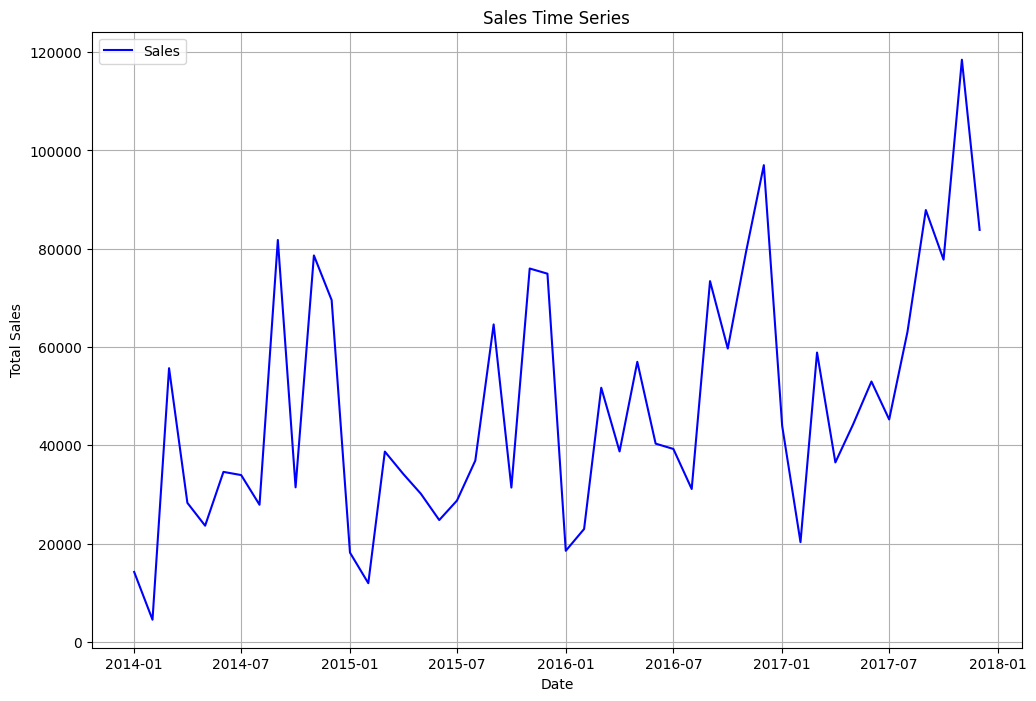

In [90]:
# Step 1: Visualize the time series
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(series.index, series['Sales'], label='Sales', color='blue')
plt.title('Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(loc='best')
plt.grid(True)

plt.show()

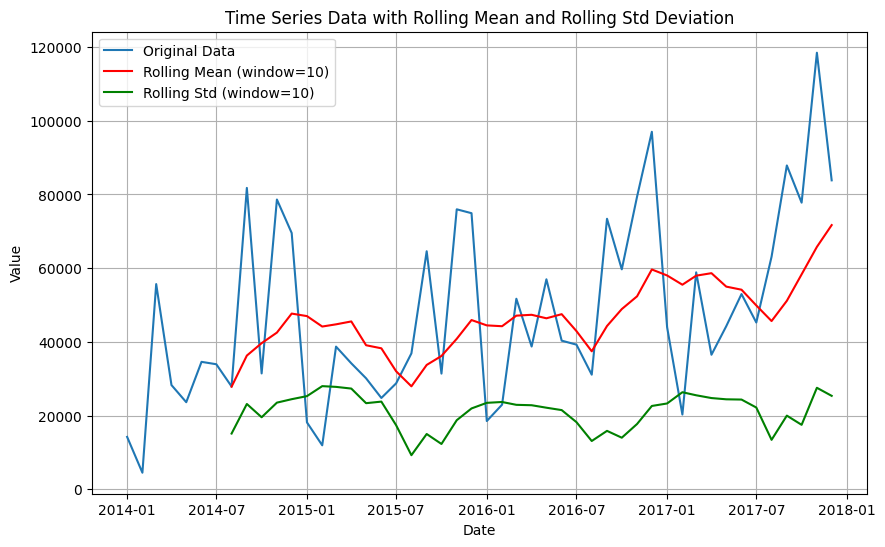

ADF Statistic: -4.493767844002665
p-value: 0.00020180198458237758
Critical Values:
	1%: -3.5778480370438146
	5%: -2.925338105429433
	10%: -2.6007735310095064


In [91]:
# Step 2: Stationarize the series
from statsmodels.tsa.stattools import adfuller
def stationarize_series(series):
    rolling_mean = series.rolling(window=8).mean()
    rolling_std = series.rolling(window=8).std()

    plt.figure(figsize=(10, 6))
    plt.plot(series, label='Original Data')
    plt.plot(rolling_mean, color='red', label='Rolling Mean (window=10)')
    plt.plot(rolling_std, color='green', label='Rolling Std (window=10)')
    plt.title('Time Series Data with Rolling Mean and Rolling Std Deviation')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()
    # Perform Dickey-Fuller test
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
stationarize_series(series['Sales'])

In [92]:
#stationarize_series(series.Sales.diff().dropna())

In [93]:
#stationarize_series(series.Sales.diff().diff().dropna())

In [94]:
# Finding q parameter value
#from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(series.diff().dropna())

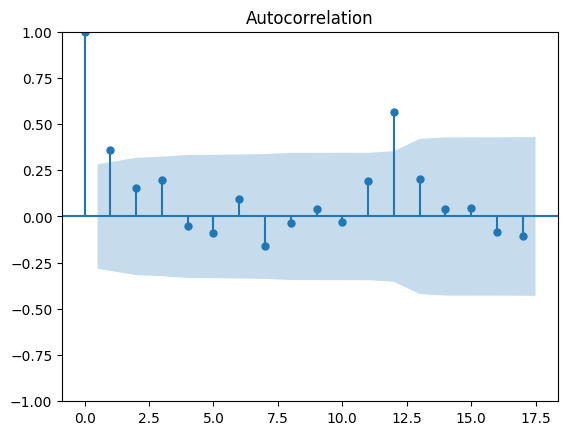

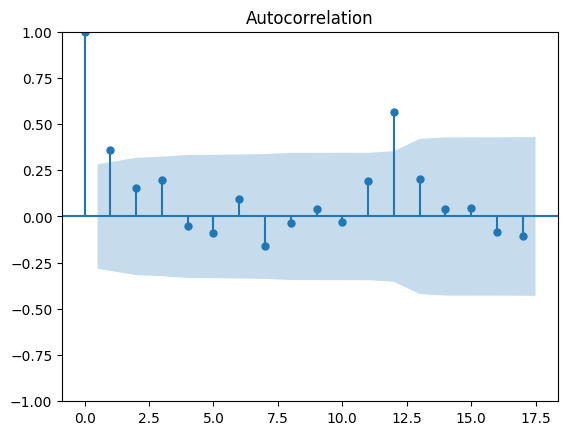

In [95]:
# Finding q parameter value
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series.dropna())

In [96]:
# Step 4: Build the ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(series['Sales'], order=(1,1,2))
arima_model = model.fit()
# Step 5: Predict
forecast = arima_model.predict()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


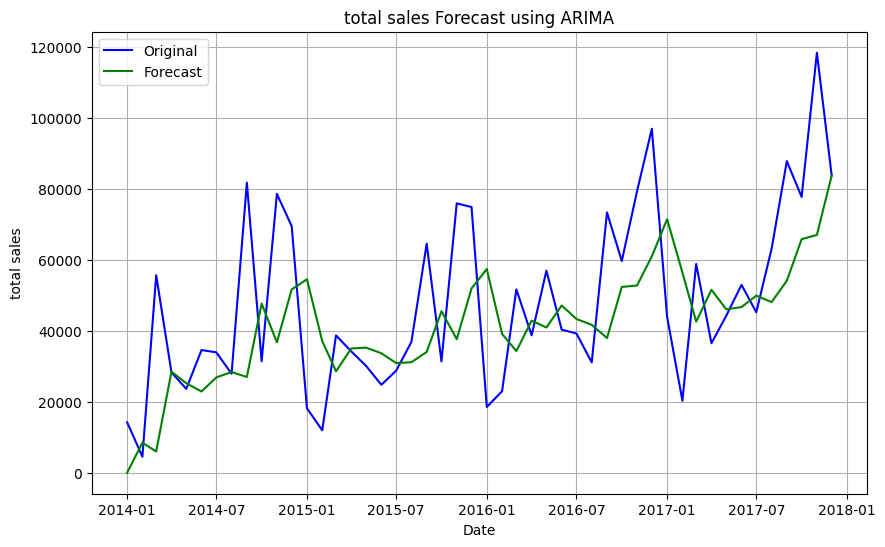

In [97]:
plt.figure(figsize=(10, 6))
plt.plot(series.index, series['Sales'], label='Original', color='blue')
plt.plot(series.index ,  forecast, label='Forecast', color='green')
plt.title('total sales Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('total sales')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [98]:
start_index = '2018-1-1'
end_index = '2021-1-1'

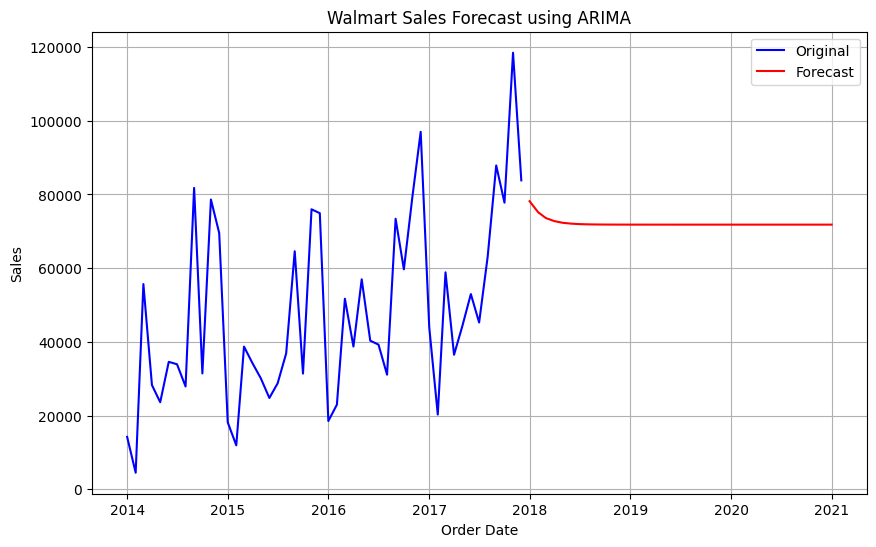

In [99]:
forecast = arima_model.predict(start=start_index, end=end_index , dynamic=False)
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(series.index, series['Sales'], label='Original', color='blue')
plt.plot(pd.date_range(start=series.index[-1], periods=len(forecast), freq='M'), forecast, label='Forecast', color='red')
plt.title('Walmart Sales Forecast using ARIMA')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid(True)
plt.show()